In [1]:
%pylab inline
%config InlineBackend.figure_format = 'retina'
import surfinBH
import matplotlib as mpl
import scipy.stats as st
from matplotlib.colors import LogNorm
from matplotlib import ticker
from numba import jit

fig_mm = 1/25.4
plt.rcParams.update({'font.size': 9})

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
print(list(surfinBH.fits_collection.keys()))
#fit_name = 'NRSur7dq4EmriRemnant'
fit_name = 'NRSur7dq4Remnant'

surfinBH.fits_collection[fit_name].desc
surfinBH.fits_collection[fit_name].refs
fit = surfinBH.LoadFits(fit_name)

['NRSur3dq8Remnant', 'surfinBH7dq2', 'NRSur7dq4Remnant', 'NRSur7dq4EmriRemnant']
Loaded NRSur7dq4Remnant fit.


In [3]:
help(fit)

Help on Fit7dq4 in module surfinBH._fit_evaluators.fit_7dq4 object:

class Fit7dq4(surfinBH.surfinBH.SurFinBH)
 |  Fit7dq4(name, load_nrsur=False)
 |  
 |  A class for the NRSur7dq4Remnant model presented in Varma et al.,
 |  arxiv:1905.09300, hereafter referred to as THE PAPER.
 |  
 |  This model predicts the final mass mf, final spin vector
 |  chif and final kick velocity vector vf, for the remnants of precessing
 |  binary black hole systems.  The fits are done using Gaussian Process
 |  Regression (GPR) and also provide an error estimate along with the fit
 |  value.
 |  
 |  This model has been trained in the parameter space:
 |      q <= 4, |chiA| <= 0.8, |chiB| <= 0.8
 |  
 |  However, it extrapolates reasonably to:
 |      q <= 6, |chiA| <= 1, |chiB| <= 1
 |  
 |  =========================================================================
 |  Usage:
 |  
 |  import surfinBH
 |  
 |  # Load the fit
 |  fit = surfinBH.LoadFits('NRSur7dq4Remnant')
 |  
 |  We provide the following

In [4]:
def load_data(IMF_idx, a_idx, dc_ratio, iso_k):
    edds = [0.1,0.5,1,5]
    bzs = [0,0.1,0.5,1]
    dic = {}
    for i in range(len(edds)):
        for j in range(len(bzs)):
            name = "results/MC-%s-%.2lf-%.2lf-%.2lf-%.2lf-%d.txt"% (IMF_idx, a_idx, edds[i], dc_ratio, bzs[j], iso_k)
            data = np.loadtxt(name)
            dic[str(i)+'-'+str(j)] = data

    return dic

def kde(I, a):
    xmin, xmax = 0, 180
    ymin, ymax = 0, 1

    xx, yy = np.mgrid[xmin:xmax:50j, ymin:ymax:50j]
    positions = np.vstack([xx.ravel(), yy.ravel()])
    values = np.vstack([I, a])
    kernel = st.gaussian_kde(values)
    f = np.reshape(kernel(positions).T, xx.shape)
    
    return xx, yy, f

def draw_eht_mad(ax):
    as_grid = [0, 1/3,2/3,1]
    i_grid = [0, 20,40,60,80,100,120,140,160,180]
    pass_cases = [[0,0,0,0,0,0,0,0,0],[0,2,0,0,0,0,0,2,0 ],[0,2,0,0,0, 0,0,2,0]]
    hatch = [['','','','','','','','',''],['','','','','','','','',''],['','','','','','','','/////','']]
    for i in range(len(as_grid)-1):
        ax.axhline(as_grid[i],ls='-',color='black',lw=1)
        for j in range(len(i_grid)-1):
            ax.axvline(i_grid[j],ls='-',color='black',lw=1)
            pass_num = pass_cases[i][j]
            if pass_num > 0:
                ax.axvspan(i_grid[j],i_grid[j+1], as_grid[i],as_grid[i+1],color='green',alpha=0.99,ls='-',linewidth=.1)
                ax.axvspan(i_grid[j],i_grid[j+1], as_grid[i],as_grid[i+1],color='None',alpha=0.99,ls='-',hatch=hatch[i][j],linewidth=.1)
            else:
                ax.axvspan(i_grid[j],i_grid[j+1], as_grid[i],as_grid[i+1],color='firebrick',alpha=0.99,ls='-',linewidth=.1)
                ax.axvspan(i_grid[j],i_grid[j+1], as_grid[i],as_grid[i+1],color='None',alpha=0.99,ls='-',hatch=hatch[i][j],linewidth=.1)
            

def draw_eht_sane(ax):
    as_grid = [0,1/3,2/3,1]
    i_grid = [0, 20,40,60,80,90]
    pass_cases = [[0,0,1,1,0],[0,2,1,1, 0],[0,1,0,0, 0]]
    colors=['red','yellow','orange','blue','green']
    for i in range(len(as_grid)-1):
        ax.axhline(as_grid[i],ls='-',color='black',lw=1)
        for j in range(len(i_grid)-1):
            ax.axvline(i_grid[j],ls='-',color='black',lw=1)
            pass_num = pass_cases[i][j]
            if pass_num > 0:
                ax.axvspan(i_grid[j],i_grid[j+1], as_grid[i],as_grid[i+1],color='green',alpha=pass_num/4,ls='-')
            else:
                ax.axvspan(i_grid[j],i_grid[j+1], as_grid[i],as_grid[i+1],color='red',alpha=1,ls='-')


/var/folders/5k/755tmvm129l96bnf2zwbb07m0000gn/T/ipykernel_48500/2892517833.py:32: UserWarning: The following kwargs were not used by contour: 'label'
  ax.contourf(xx, yy, f,levels=np.linspace(1e-2,f.max(),10),cmap=cmp,alpha=1,label='$a_1$='+str(a1_max))
/var/folders/5k/755tmvm129l96bnf2zwbb07m0000gn/T/ipykernel_48500/2892517833.py:32: UserWarning: The following kwargs were not used by contour: 'label'
  ax.contourf(xx, yy, f,levels=np.linspace(1e-2,f.max(),10),cmap=cmp,alpha=1,label='$a_1$='+str(a1_max))
/var/folders/5k/755tmvm129l96bnf2zwbb07m0000gn/T/ipykernel_48500/2892517833.py:32: UserWarning: The following kwargs were not used by contour: 'label'
  ax.contourf(xx, yy, f,levels=np.linspace(1e-2,f.max(),10),cmap=cmp,alpha=1,label='$a_1$='+str(a1_max))
/var/folders/5k/755tmvm129l96bnf2zwbb07m0000gn/T/ipykernel_48500/2892517833.py:32: UserWarning: The following kwargs were not used by contour: 'label'
  ax.contourf(xx, yy, f,levels=np.linspace(1e-2,f.max(),10),cmap=cmp,alpha=1,labe

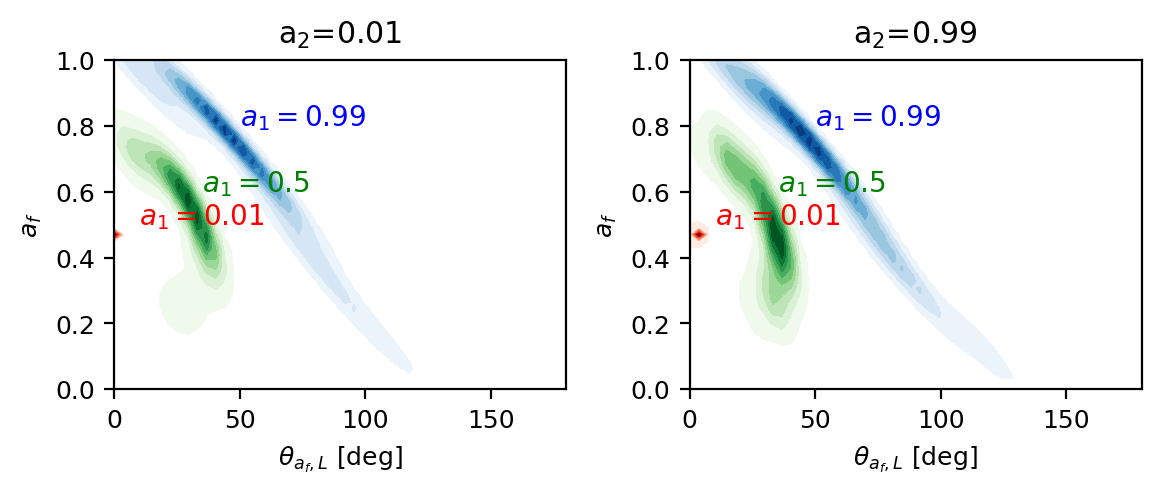

In [5]:
def verify(ax, q, N, a1_max, a2_max, cmp):
    cosi1 = np.random.rand(N)*2-1
    cosi2 = np.random.rand(N)*2-1
    sini1 = np.sqrt(1-cosi1**2)
    sini2 = np.sqrt(1-cosi2**2)
    phi1 = np.random.rand(N)*2*np.pi
    phi2 = np.random.rand(N)*2*np.pi

    c1xx = a1_max*np.sin(phi1)*sini1
    c1yy = a1_max*np.cos(phi1)*sini1
    c1zz = a1_max*cosi1
    c2xx = a2_max*np.sin(phi2)*sini2
    c2yy = a2_max*np.cos(phi2)*sini2
    c2zz = a2_max*cosi2

    chi = []
    cos=[]
    cos2 = []
    for c1x, c1y, c1z, c2x, c2y, c2z in zip(c1xx, c1yy, c1zz, c2xx, c2yy, c2zz):
        mf, chif, vf, mf_err, chif_err, vf_err = fit.all(q, [c1x,c1y,c1z], [c2x,c2y,c2z])
        chifx = chif[0]
        chify = chif[1]
        chifz = chif[2]
        chi0 = np.sqrt( chifx * chifx + chify * chify + chifz * chifz)
        chi.append(np.sqrt(chifx**2+chify**2+chifz**2))
        cos.append(chifz/chi0)
        cos2.append((c1x*chifx+c1y*chify+c1z*chifz)/chi0/a1_max)

    xx, yy ,f = kde(np.arccos(cos)/np.pi*180, chi)


    ax.contourf(xx, yy, f,levels=np.linspace(1e-2,f.max(),10),cmap=cmp,alpha=1,label='$a_1$='+str(a1_max))
   
def draw_merger_spin():
    fig = plt.figure(figsize=(88*fig_mm*1.7, 66*fig_mm))
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)
    a2max = 0.01
    verify(ax1, 4, 100, 0.99, a2max,'Blues')
    verify(ax1, 4, 100, 0.5, a2max,'Greens')
    verify(ax1, 4, 100, 0.01, a2max,'Reds')
    ax1.set_xlabel(r'$\theta_{a_f, L}$ [deg]')
    ax1.set_ylabel(r'$a_f$')
    ax1.text(10,0.5,r'$a_1=0.01$',color='r',fontsize=10)
    ax1.text(35,0.6,r'$a_1=0.5$',color='g',fontsize=10)
    ax1.text(50,0.8,r'$a_1=0.99$',color='b',fontsize=10)
    ax1.set_title(r'a$_2$=0.01')

    a2max = 0.99
    verify(ax2, 4, 100, 0.99, a2max,'Blues')
    verify(ax2, 4, 100, 0.5, a2max,'Greens')
    verify(ax2, 4, 100, 0.01, a2max,'Reds')
    ax2.set_xlabel(r'$\theta_{a_f, L}$ [deg]')
    ax2.set_ylabel(r'$a_f$')
    ax2.text(10,0.5,r'$a_1=0.01$',color='r',fontsize=10)
    ax2.text(35,0.6,r'$a_1=0.5$',color='g',fontsize=10)
    ax2.text(50,0.8,r'$a_1=0.99$',color='b',fontsize=10)
    ax2.set_title(r'a$_2$=0.99')

    plt.tight_layout()

    plt.savefig('paper-fig/ex-fig5.eps',dpi=800,bbox_inches='tight')
draw_merger_spin()

/var/folders/5k/755tmvm129l96bnf2zwbb07m0000gn/T/ipykernel_21522/261181941.py:75: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(wspace=0, hspace=0)


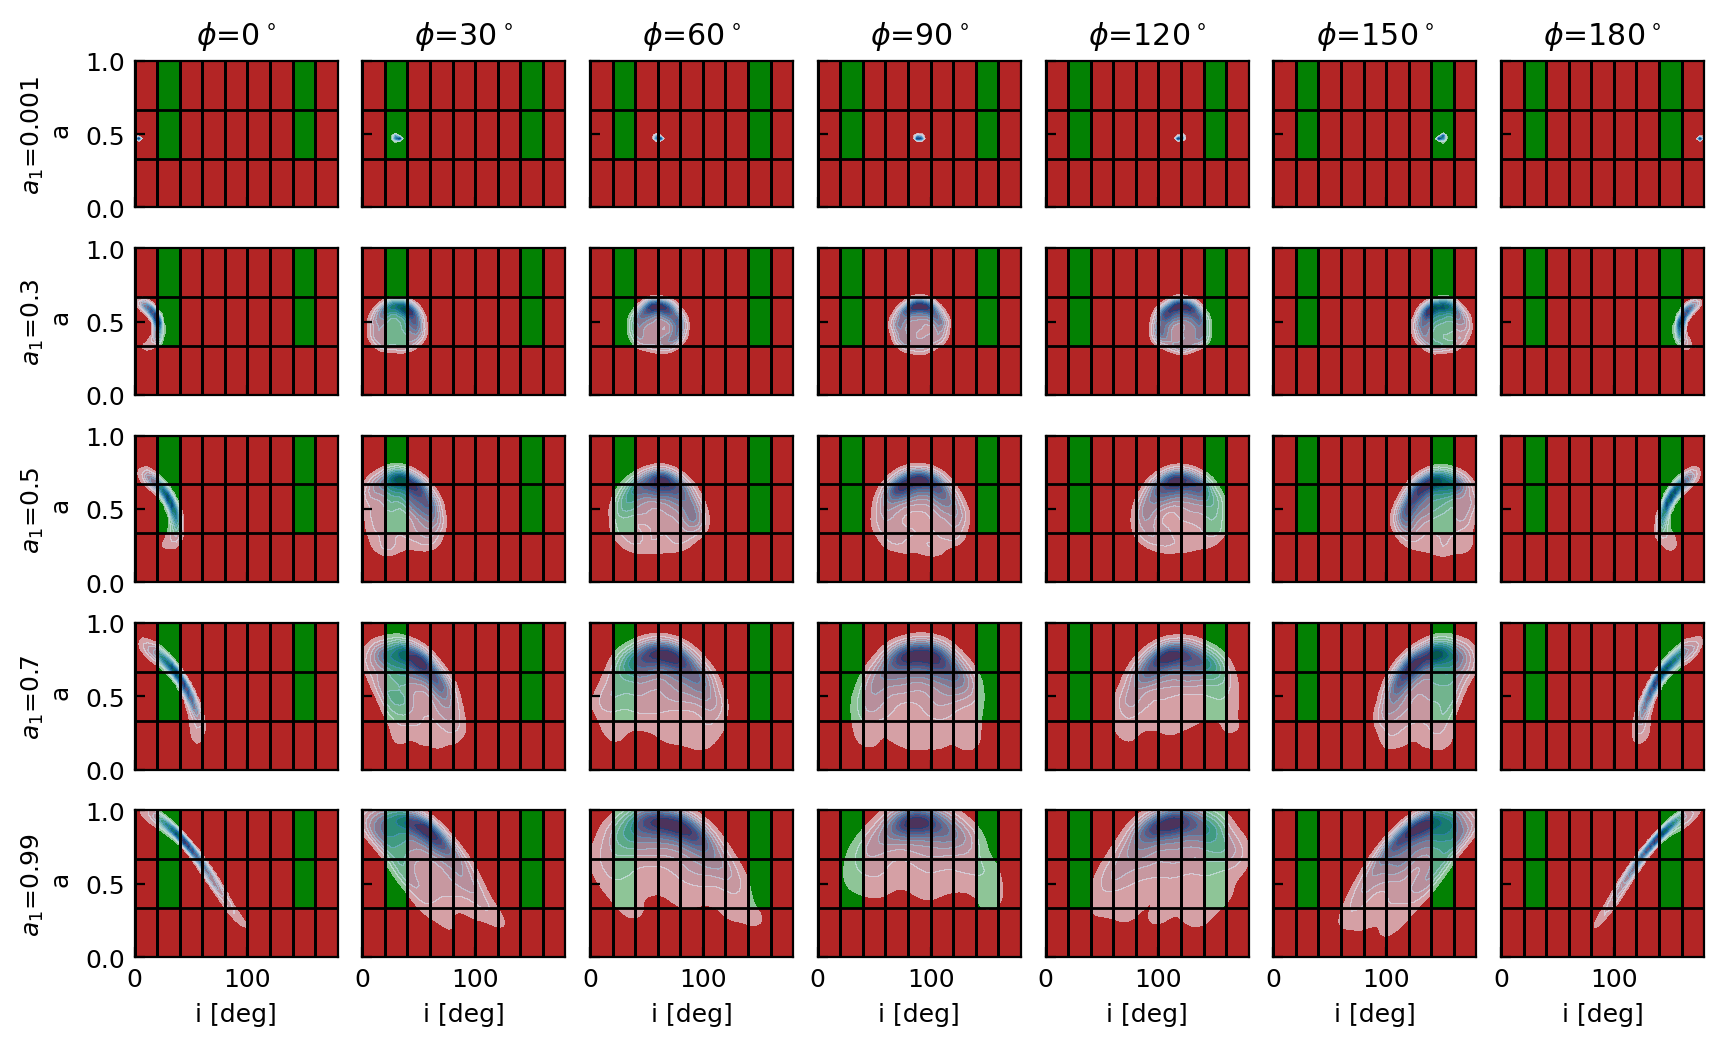

In [5]:
def mergers(ax, q, N, a1_max, a2_max, cmp, theta_m):
    cosi1 = np.random.rand(N)*2-1
    cosi2 = np.random.rand(N)*2-1
    sini1 = np.sqrt(1-cosi1**2)
    sini2 = np.sqrt(1-cosi2**2)
    phi1 = np.random.rand(N)*2*np.pi
    phi2 = np.random.rand(N)*2*np.pi

    phi_orbs= np.random.rand(N)*2*np.pi

    c1xx = a1_max*np.sin(phi1)*sini1
    c1yy = a1_max*np.cos(phi1)*sini1
    c1zz = a1_max*cosi1
    c2xx = a2_max*np.sin(phi2)*sini2
    c2yy = a2_max*np.cos(phi2)*sini2
    c2zz = a2_max*cosi2

    chi = []
    cos=[]
    
    for c1x, c1y, c1z, c2x, c2y, c2z, phi_orb in zip(c1xx, c1yy, c1zz, c2xx, c2yy, c2zz, phi_orbs):
        mf, chif, vf, mf_err, chif_err, vf_err = fit.all(q, [c1x,c1y,c1z], [c2x,c2y,c2z])
        chifx = chif[0]
        chify = chif[1]
        chifz = chif[2]
        chi0 = np.sqrt( chifx * chifx + chify * chify + chifz * chifz)
        chi.append(np.sqrt(chifx**2+chify**2+chifz**2))
        cosi = (chifx*np.sin(theta_m)*np.cos(phi_orb)  + chify*np.sin(theta_m)*np.sin(phi_orb) + chifz* np.cos(theta_m))/chi0
        cos.append(cosi)


    xx, yy ,f = kde(np.arccos(cos)/np.pi*180, chi)


    cs = ax.contourf(xx, yy, f,levels=np.linspace(f.max()/10,f.max(),10),cmap=cmp,alpha=0.6)
    return cs

def draw_merger_spin(q,a2max):
    theta_orbs = [0, 30, 60, 90, 120, 150, 180]
    a1s = [0.001,0.3,0.5,0.7,0.99]


    fig, axs = plt.subplots(nrows=len(a1s), ncols=len(theta_orbs),figsize=(180*fig_mm*1.2, 130*fig_mm*1),constrained_layout=True)

    #axs = [fig.add_subplot(len(a1s),len(theta_orbs),i*len(theta_orbs)+j+1) for i in range(len(a1s)) for j in range(len(theta_orbs))]
    
   
    for i, a1 in enumerate(a1s):
        for j, theta_orb in enumerate(theta_orbs):
            ax = axs[a1s.index(a1),theta_orbs.index(theta_orb)]
            draw_eht_mad(ax)
            cs = mergers(ax, q, 1000, a1, a2max,'Blues',theta_orb/180*np.pi)
            ax.set_xlim(0,180)
            ax.set_ylim(0,1)
            if j==0:
                ax.set_ylabel('$a_1$='+str(a1)+'\n a')
            else:
                ax.set_yticklabels([])

            if i==len(a1s)-1:
                ax.set_xlabel(r'i [deg]')
            else:
                ax.set_xticklabels([])

            if i == 0:
                ax.set_title(r'$\phi$='+str(theta_orb)+'$^\circ$')

            #if j == len(theta_orbs)-1:
            #    cbar = fig.colorbar(cs, ax=ax)
            #    #cbar.set_ticks(np.logspace(-2,0,11))
            #    cbar.set_label('KDE')
            ax.tick_params(axis="y", direction='in')
            ax.tick_params(axis="x", direction='in')

    plt.subplots_adjust(wspace=0, hspace=0)
    #plt.tight_layout()
    plt.savefig('paper-fig/merger-mad-'+str(q)+'.png',dpi=800,bbox_inches='tight')
    #plt.savefig('paper-fig/merger-eht'+str(theta_orb)+'-'+str(a1)+'.pdf',bbox_inches='tight')
#draw_merger_spin(4, 0.99)
draw_merger_spin(8, 0.99)
draw_merger_spin(16, 0.99)

[77.53229688] 0.3 1 58290247.839384206 86620.65672009678 2500
[45.95670716 62.52328402 27.75740245 74.56467436 79.83070689 53.26729712
 65.57136813 72.80973059 59.01741247 70.94429152 65.09041556 44.22120917
 69.53196957 73.94422674 73.59613298 67.68491776 42.5656168  75.14923686
 69.64706017 63.48757792 78.85287813] 0.5 21 221221770.34526923 3203.1063741810653 2500
[81.06625635 52.62791524 55.88962477 50.73327243 51.3854426  36.78556555
 44.72548418 61.05811862 76.26392433 69.18110493 66.34485382 58.22881411
 60.69543532 60.74939515 40.9228171  58.6943932  59.83236057 58.67199443
 46.79541496 59.10096472 74.8010009  47.68370077 54.76331044 52.67784835] 0.7 24 766460618.119305 7909.799845758278 2500
[66.02893126 79.93342661 65.87455151 52.57861163] 0.99 4 13426780443.158108 24897.625862106906 2500


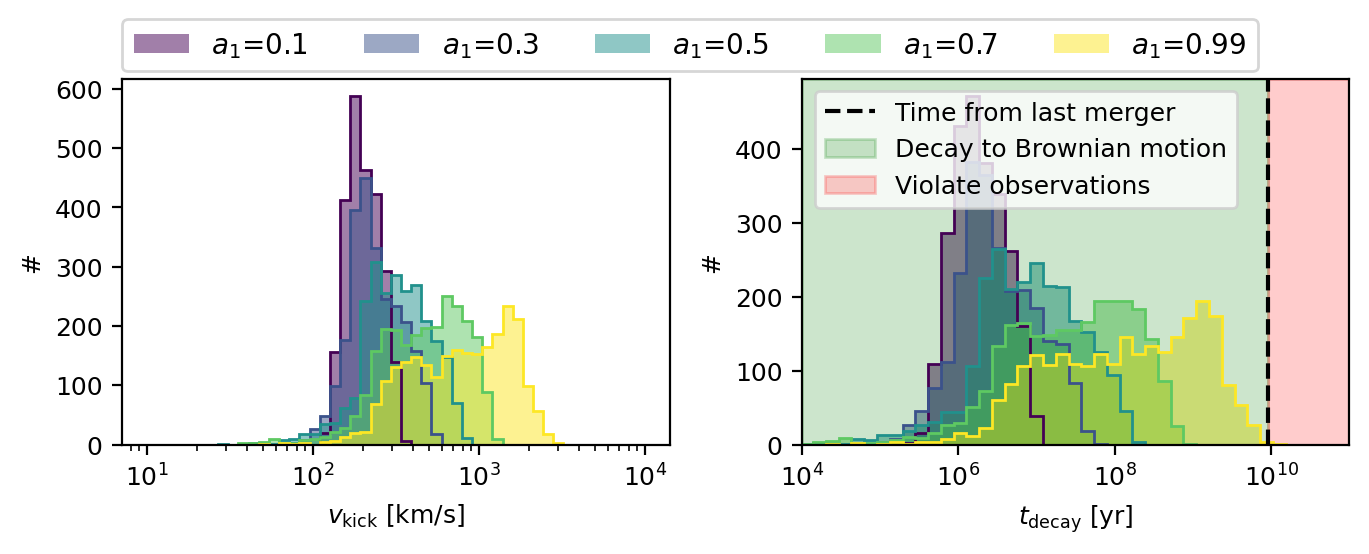

In [141]:
def get_return_time(v_kick):
    from scipy import interpolate
    d = np.loadtxt('return-time.csv',delimiter=',')
    v = d[:,0]
    t = d[:,1]
    
    fit = np.polyfit(np.log10(v), np.log10(t), 1)
   
    t_return = 10**(fit[0]*np.log10(v_kick)+fit[1])
    #t_return[t_return< 1e6] = 1e6 #base phase I TIME
    return t_return

def merger_kick(q, N, a1_max, a2_max):
    cosi1 = np.random.rand(N)*2-1
    cosi2 = np.random.rand(N)*2-1
    sini1 = np.sqrt(1-cosi1**2)
    sini2 = np.sqrt(1-cosi2**2)
    phi1 = np.random.rand(N)*2*np.pi
    phi2 = np.random.rand(N)*2*np.pi


    c1xx = a1_max*np.sin(phi1)*sini1
    c1yy = a1_max*np.cos(phi1)*sini1
    c1zz = a1_max*cosi1
    c2xx = a2_max*np.sin(phi2)*sini2
    c2yy = a2_max*np.cos(phi2)*sini2
    c2zz = a2_max*cosi2

    v_kick = []
    
    for c1x, c1y, c1z, c2x, c2y, c2z in zip(c1xx, c1yy, c1zz, c2xx, c2yy, c2zz):
        mf, chif, vf, mf_err, chif_err, vf_err = fit.all(q, [c1x,c1y,c1z], [c2x,c2y,c2z])
       # print(vf)
        v = np.sqrt(vf[0]**2+vf[1]**2+vf[2]**2)
        v_kick.append(v)

    return v_kick

def draw_merger_kick(q,a2max):
    
    a1s = [0.1,0.3,0.5,0.7,0.99]


    fig = plt.figure(figsize=(88*fig_mm*2, 66*fig_mm))
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)
  
    
    colors = cm.viridis(np.linspace(0,1,len(a1s)))
    for c, a1 in zip(colors, a1s):
        v_kick = merger_kick(q, 2500, a1, a2max)

        v_kick = np.array(v_kick)*3e5
        t_return = get_return_time(v_kick)
        if (t_return< 1e5).sum() > 0:
            print(v_kick[t_return<1e5], a1 , (t_return< 1e5).sum(), t_return.max(),t_return.min(), len(t_return))
        
        bins = np.logspace(1,4,50)
        ax1.hist((v_kick), bins=bins, histtype='step',density=False,color=c)
        ax1.hist((v_kick), bins=bins, histtype='stepfilled',label='$a_1$='+str(a1),density=False,color=c,alpha=0.5)
        ax1.set_xscale('log')

        bins = np.logspace(3,11,50)
        ax2.hist((t_return), bins=bins, histtype='step',density=False,color=c)
        ax2.hist((t_return), bins=bins, histtype='stepfilled',density=False,color=c,alpha=0.5)
        ax2.set_xscale('log')

    #ax1.axvline(0.2,ls='--',color='black',label='Brownian motion')
    ax2.axvline(9e9,ls='--',color='black',label='Time from last merger')
    ax2.axvspan(1e4, 9e9, color='green', alpha=0.2, label='Decay to Brownian motion')
    ax2.axvspan(9e9, 1e11, color='red', alpha=0.2, label='Violate observations')
    ax2.set_xlim(1e4,1e11)
    ax2.legend()

    p_v = [(0,15,22), (4,18,32), (5,23,41)]
    refs = ['Reid & Treuhaft 1999', 'Reid & Brunthaler 2004', 'Ghez et al. 2008' ]

    colors = cm.cool(np.linspace(0,1,len(p_v)))
    #for p, ref , c in zip(p_v, refs, colors):
    #    ax1.axvspan(p[0], p[2], alpha=0.3, color=c,label=ref)
    ax1.set_xlabel(r'$v_{\rm kick}$ [km/s]')
    ax1.set_ylabel('#')
    #ax1.set_yscale('log')

    ax2.set_xlabel(r'$t_{\rm decay}$ [yr]')
    ax2.set_ylabel('#')
    #ax2.set_yscale('log')
    plt.tight_layout()
    ax1.legend(fontsize=10,ncol=5,bbox_to_anchor=(2.1,1.2))
    
    plt.savefig('paper-fig/merger-kick-'+str(q)+'.pdf',bbox_inches='tight')
    #ax.set_yscale('log')
draw_merger_kick(4, 0.99)

In [ ]:
def generate_merger():
    chi = []
    cos=[]
    for k in range(N):
        id1 = random.choice(len(a))
        id2 = random.choice(len(a))
        phi1 = (np.random.rand(1)*2*np.pi)[0]
        phi2 = (np.random.rand(1)*2*np.pi)[0]
        cosI1 = cosI[id1]
        cosI2 = cosI[id2]
        sinI1 = np.sqrt(1-cosI1**2)
        sinI2 = np.sqrt(1-cosI2**2)

        c1xp = a[id1]*sinI1*np.cos(phi1)
        c1yp = a[id1]*sinI1*np.sin(phi1)
        c1zp = a[id1]*cosI1

        c1x = c1xp
        c1y = c1yp*np.cos(inc*np.pi/180)-c1zp*np.sin(inc*np.pi/180)
        c1z = c1yp*np.sin(inc*np.pi/180)+c1zp*np.cos(inc*np.pi/180)

        c2xp = a[id2]*sinI2*np.cos(phi2)
        c2yp = a[id2]*sinI2*np.sin(phi2)
        c2zp = a[id2]*cosI2

        c2x = c2xp
        c2y = c2yp*np.cos(inc2*np.pi/180)-c2zp*np.sin(inc2*np.pi/180)
        c2z = c2yp*np.sin(inc2*np.pi/180)+c2zp*np.cos(inc2*np.pi/180)
                
                
        q=16
        mf, chif, vf, mf_err, chif_err, vf_err = fit.all(q, [c1x,c1y,c1z], [c2x,c2y,c2z])
        chifx = chif[0]
        chify = chif[1]
        chifz = chif[2]
        chi.append(np.sqrt(chifx**2+chify**2+chifz**2))
        cos.append((-np.sin(inc*np.pi/180)*chify+np.cos(inc*np.pi/180)*chifz)/np.sqrt(chifx**2+chify**2+chifz**2))
                
        chi = np.array(chi)
        cos = np.array(cos)
        X = chi
        cosi = cos
        I = np.arccos(cosi)*180/np.pi

In [7]:
def draw_spin_constrain(ax, IMF_idx, edds, bz, eht_c):
    a_idx = 0.001
    dc_ratio = 1
    #IMF_idx = 3
    #edds = 1
    #bz = 0
    if eht_c == 'mad':
        draw_eht_mad(ax)
    elif eht_c == 'sane':
        draw_eht_sane(ax)

    iso_ks = [0, 30]
    cmps = ['Blues','Wistia'] 
    #iso_ks = [1]
    #cmps = ['hot']

    for iso_k, cmp in zip(iso_ks, cmps):
        name = "paper-run/MC-%s-%.2lf-%.2lf-%.2lf-%.2lf-%d.txt"% (IMF_idx, a_idx, edds, dc_ratio, bz, iso_k)
        data = np.loadtxt(name)
        if (len(data)<2): 
            print("No data")       
        else:
            m = data[:,7]
        success = m>4.1e6
        if sum(success) < 10:
            print("No enough data")
            break
        a = data[success,3]
        a_x = data[success,4]
        a_y = data[success,5]
        a_z = data[success,6]
        I = np.arccos(a_x/a)*180/np.pi
        xx, yy ,f = kde(I, a)
        cfset = ax.contourf(xx, yy, f,levels=np.linspace(f.max()/100,f.max(),30),cmap=cmp,alpha=0.7)


No enough data
No enough data
No enough data


/var/folders/5k/755tmvm129l96bnf2zwbb07m0000gn/T/ipykernel_21522/4178029257.py:30: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


No enough data
No enough data
No enough data


/var/folders/5k/755tmvm129l96bnf2zwbb07m0000gn/T/ipykernel_21522/4178029257.py:30: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/5k/755tmvm129l96bnf2zwbb07m0000gn/T/ipykernel_21522/4178029257.py:30: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


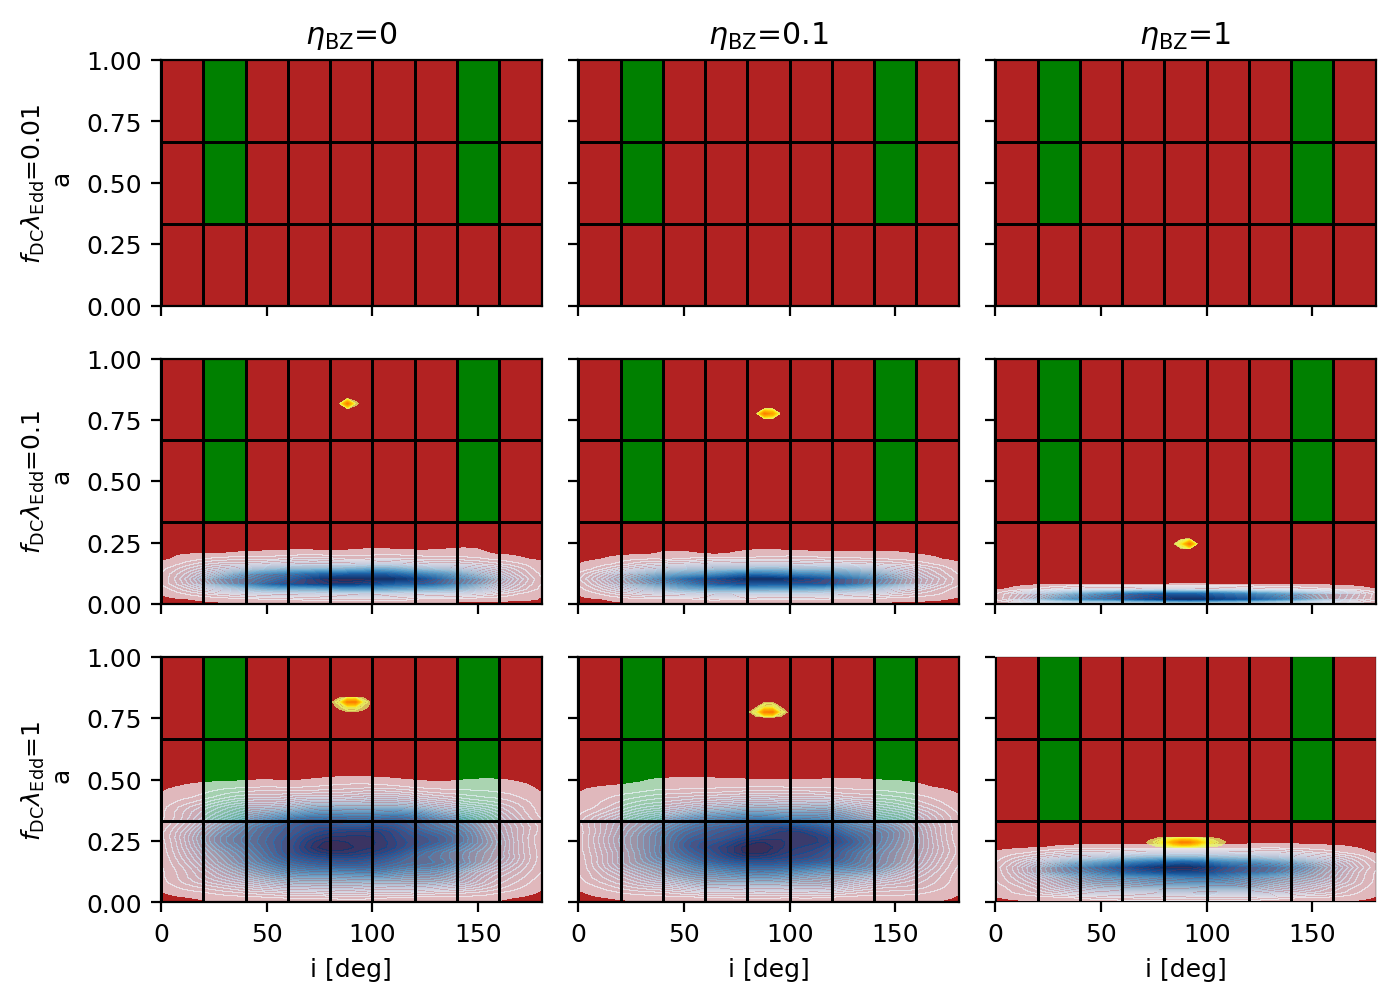

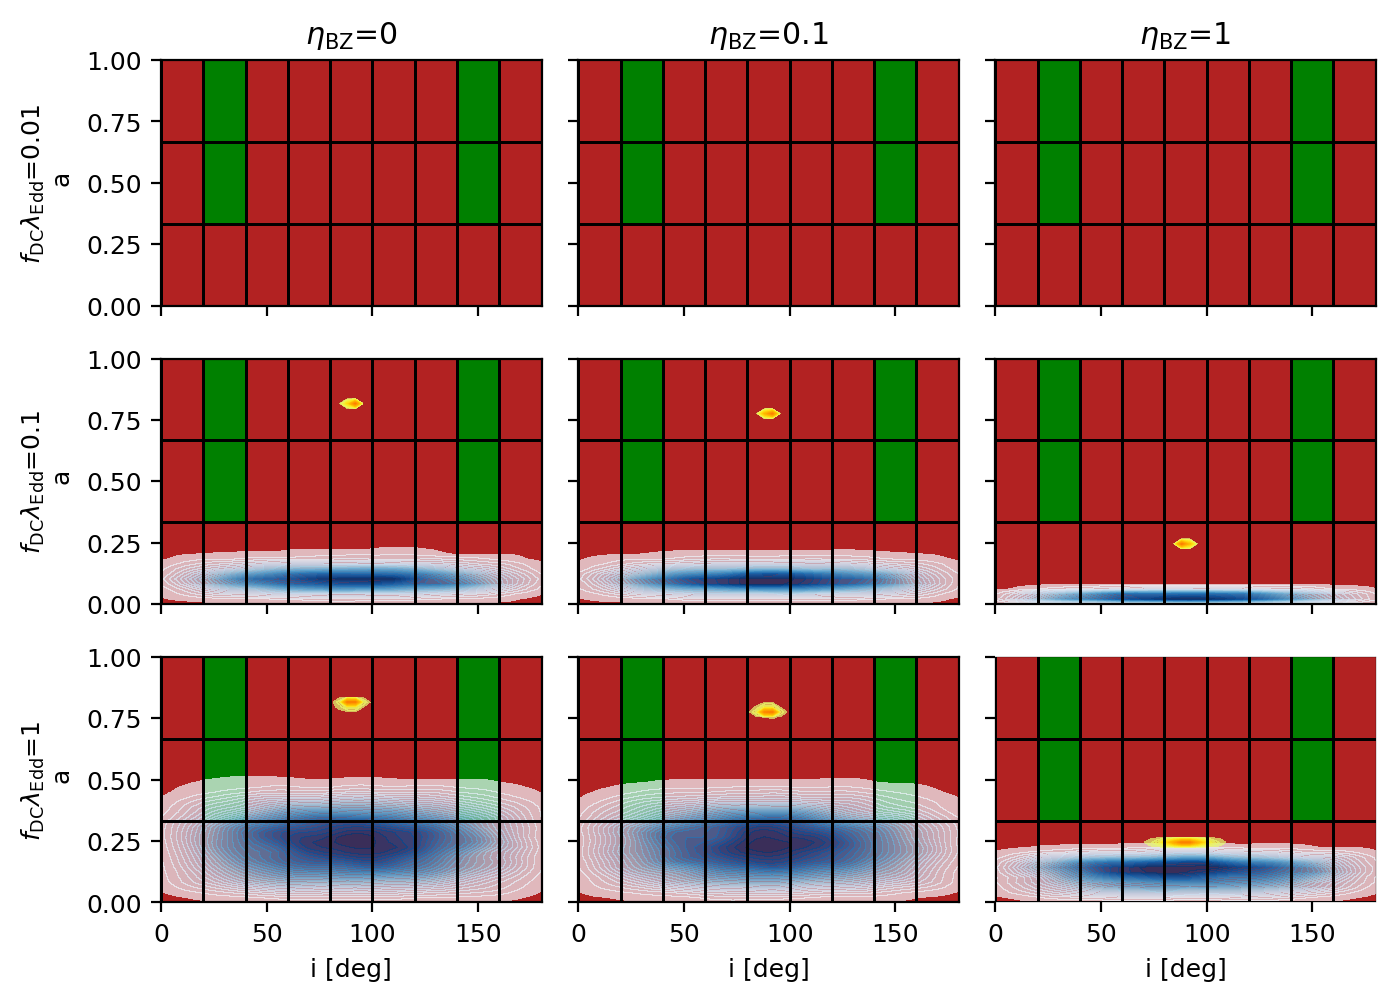

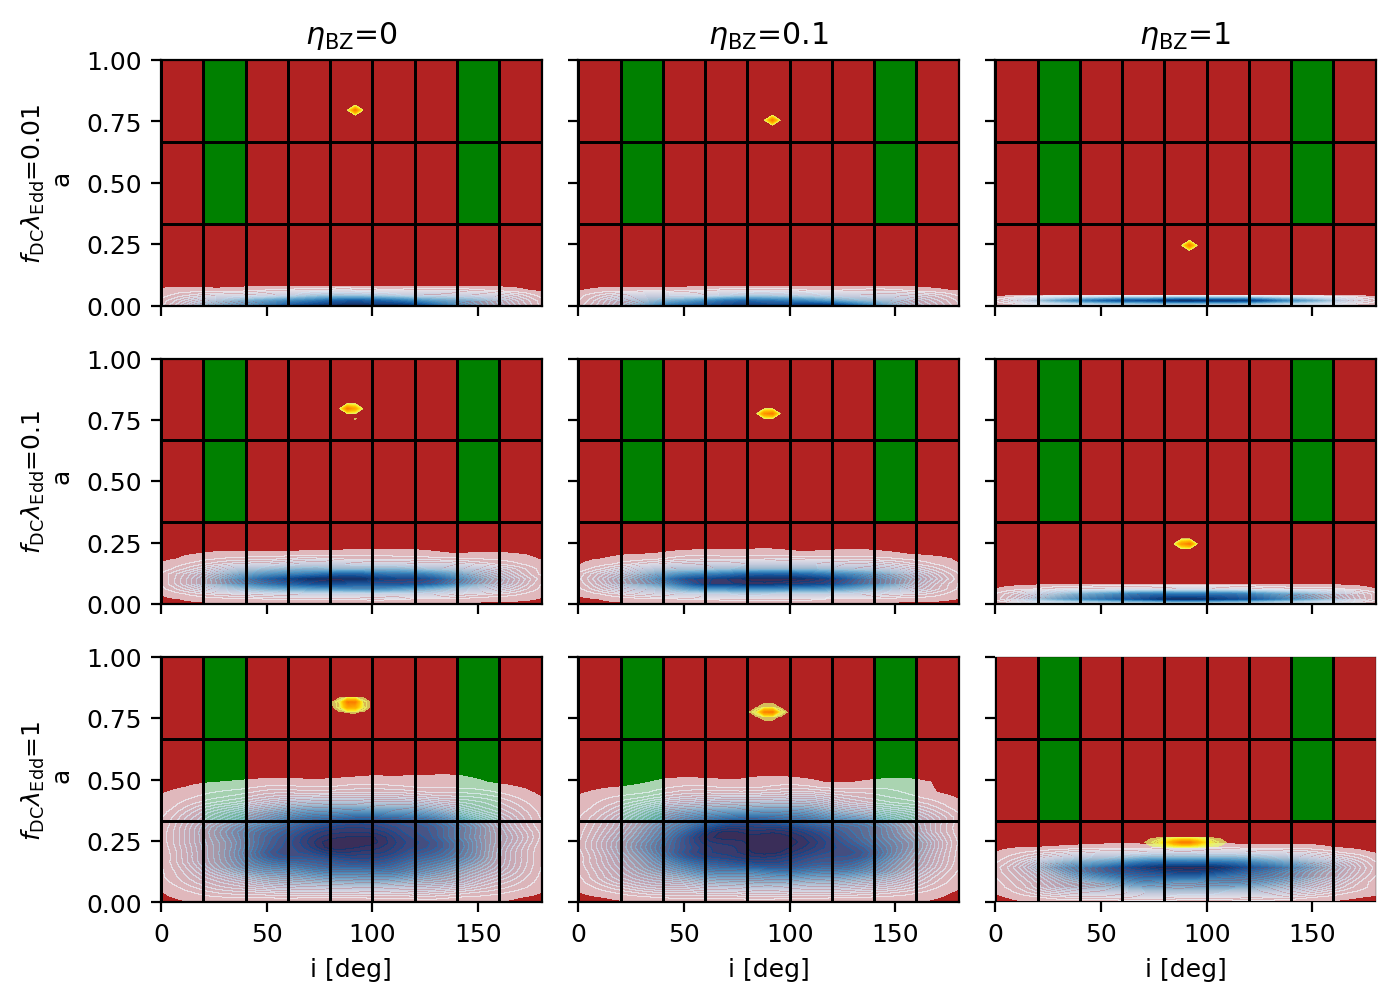

In [9]:
def draw_accretion(seed, eht_c):
    edds = [0.01,0.1,1]
    bzs = [0,0.1,1]
    fig, axs = plt.subplots(nrows=len(edds), ncols=len(bzs),figsize=(180*fig_mm, 130*fig_mm),constrained_layout=True)
    
    for i, edd in enumerate(edds):
        for j, bz in enumerate(bzs):
            ax = axs[edds.index(edd),bzs.index(bz)]
            draw_eht_mad(ax)
            draw_spin_constrain(ax, seed, edd, bz, eht_c)

            ax.set_xlim(0,180)
            ax.set_ylim(0,1)
            
            
            if j==0:
                ax.set_ylabel(r'$f_{\rm DC}\lambda_{\rm Edd}$='+str(edd)+'\n a')
            else:
                ax.set_yticklabels([])

            if i == len(edds)-1:
                ax.set_xlabel(r'i [deg]')
            else:
                ax.set_xticklabels([])

            if i == 0:
                ax.set_title(r'$\eta_{\rm BZ}$='+str(bz))
    #plt.title('$f_{\\rm active}\\lambda_{\\rm Edd }$: '+str(edds)+', $\\lambda_{\\rm BZ}$: '+str(bz))
    plt.setp(ax.spines.values(), linewidth=0.1)
    plt.tight_layout()
    fig.savefig('paper-fig/'+eht_c+'-'+seed+'.png',dpi=600,bbox_inches='tight')

draw_accretion('pop3', 'mad')
draw_accretion('clusters', 'mad')
draw_accretion('direct', 'mad')

In [ ]:
def draw_conbie_constrain(IMF_idx, edds, bz):
    a_idx = 0.001
    dc_ratio = 1
    #IMF_idx = 3
    #edds = 1
    #bz = 0
    fig = plt.figure(figsize=(88*fig_mm, 66*fig_mm))
    ax = fig.add_subplot(111)
    draw_eht_mad(ax)
    mergers(ax, 4, 100, 0.7, 0.01,'Blues',theta_orb/180*np.pi)

    iso_ks = [0, 30]
    cmps = ['Blues','Grays'] 

    for iso_k, cmp in zip(iso_ks, cmps):
        name = "paper-run/MC-%.2lf-%.2lf-%.2lf-%.2lf-%.2lf-%d.txt"% (IMF_idx, a_idx, edds, dc_ratio, bz, iso_k)
        data = np.loadtxt(name)
        if (len(data)<2): 
            print("No data")       
        else:
            m = data[:,5]
        success = m>4.1e6
        if sum(success) < 5:
            print("No enough data")
            break
        a = data[success,3]
        I = np.abs(90-np.arccos(data[success,4])*180/np.pi)
        xx, yy ,f = kde(I, a)
        cfset = ax.contourf(xx, yy, f,levels=np.linspace(0.01,f.max(),5),cmap=cmp,alpha=0.9)
    ax.set_xlim(0,90)
    ax.set_ylim(0,1)
    ax.set_xlabel('i [deg]')
    ax.set_ylabel('a')
    plt.title('$f_{\\rm active}\\lambda_{\\rm Edd }$: '+str(edds)+', $\\lambda_{\\rm BZ}$: '+str(bz))

    fig.savefig('combine-mad-'+str(IMF_idx)+'-'+str(edds)+'-'+str(bz)+'.png',bbox_inches='tight')

In [ ]:
def draw_traj(a0, bz, iso_k):
    fig = plt.figure(figsize=(88*fig_mm, 1.8*66*fig_mm))
    ax1 = fig.add_subplot(311)
    ax2 = fig.add_subplot(312)
    ax3 = fig.add_subplot(313)
    dc_ratio = 1
    lss = [':','--','-']
    seeds = ['pop3', 'clusters', 'direct']
    acc_mods = ['chaotic','coherent']

    edds = [0.01, 0.1 ,1]
    #meta_c = [cm.Blues(np.linspace(0.2,0.9,len(edds))),cm.Oranges(np.linspace(0.2,0.9,len(edds))),cm.Greens(np.linspace(0.2,0.9,len(edds)))]
    colors=cm.plasma(np.linspace(0.2,0.9,len(edds)))
    for seed, c in zip(seeds, colors):
        for edd, ls in zip(edds, lss):
            name = "paper-run/traj-%s-%.2lf-%.2lf-%.2lf-%.2lf-%d.txt"% (seed, a0, edd, dc_ratio, bz, iso_k)
            data = np.loadtxt(name)
            t = data[:,0]
   
            a = data[:,1]
            cosI = data[:,2]
            m = data[:,3]
            N = data[:,4]
            if bz == 0:
                ax1.plot(t, m,c=c,ls=ls)
            else:
                ax1.plot(t, m,c=c,ls=ls)
            ax2.plot(t, a,c=c,ls=ls)  
            ax3.plot(t, cosI,c=c,ls=ls)

    ax1.axhline(4.1e6,ls='--',c='r',lw=2,label='Sgr A*')
    ax1.set_ylabel('M [$M_{\odot}]$')
    ax1.set_xticklabels([])
    ax1.set_yscale('log')
    ax1.set_xscale('log')
    ax1.plot([],[],c=colors[0],ls='-',label='pop III')
    ax1.plot([],[],c=colors[1],ls='-',label='clusters runaway')
    ax1.plot([],[],c=colors[2],ls='-',label='direct collapse')
    ax1.set_title(acc_mods[int(iso_k/40)]+r', a$_0$='+str(a0)+r', $\lambda_{\rm BZ}$='+str(bz))

    
    ax2.set_ylabel('a')
   
    ax2.set_xscale('log')
    #ax2.set_yscale('log')
    ax2.set_ylim(0,1)
    ax2.plot([],[],c='black',ls='-',label=r'$f_{\rm DC}\lambda_{\rm Edd}=1$')
    ax2.plot([],[],c='black',ls='--',label=r'$f_{\rm DC}\lambda_{\rm Edd}=0.1$')
    ax2.plot([],[],c='black',ls=':',label=r'$f_{\rm DC}\lambda_{\rm Edd}=0.01$')
    ax2.legend()

    
    ax3.set_ylabel('$cos\\theta_z$')
    ax3.set_xlabel('t [yr]')
    ax3.set_xscale('log')
    ax3.set_ylim(-1.2,1.2)
    ax1.legend()
    plt.subplots_adjust(wspace=0, hspace=0.05)
    fig.savefig('paper-fig/traj-'+str(a0)+'-'+str(bz)+'-'+str(iso_k)+'.pdf',bbox_inches='tight')
draw_traj(0.01,0, 0)
draw_traj(0.01,1, 0)
draw_traj(0.99,0, 0)
draw_traj(0.99,1, 0)

draw_traj(0.01,0, 40)
draw_traj(0.01,1, 40)
draw_traj(0.99,0, 40)
draw_traj(0.99,1, 40)

In [6]:


def draw_plot(IMF_idx, a_idx, dc_ratio, iso_k):
    edds = [0.2,0.5,1]
    bzs = [0,0.5,1]
    fig = plt.figure(figsize=(4.8*len(edds)*0.6,3.6*len(bzs)*0.5))
    axs = [fig.add_subplot(len(bzs),len(edds),i+1) for i in range(len(edds)*len(bzs))]
    for i in range(len(edds)):
        for j in range(len(bzs)):
            ax = axs[i*len(bzs)+j]
           
            ax.set_xticks([0,30,60,90,120,150,180])
            if i != len(edds)-1:
                ax.set_xticklabels([])
            else:
                ax.set_xlabel(r'$I_{a,L}$ [deg]')
                if j != len(bzs)-1:
                    ax.set_xticklabels(['0','30','60','90','120','150',''])
                else:
                    ax.set_xticklabels(['0','30','60','90','120','150','180'])
            if j != 0:
                ax.set_yticks([0.1,0.3,0.5,0.7,0.9])
                ax.set_yticklabels([])
            else:
                ax.set_ylabel(r'$a$')
                ax.set_yticks([0.1,0.3,0.5,0.7,0.9])
            
            
            
            
            name = "results/MC-%.2lf-%.2lf-%.2lf-%.2lf-%.2lf-%d.txt"% (IMF_idx, a_idx, edds[i], dc_ratio, bzs[j], iso_k)
            data = np.loadtxt(name)
            

            if (len(data)<2): 
                ax.axvspan(0,180,0,1,color='gray',alpha=0.9,hatch='////',label='Forbidden')
                ax.legend(loc='lower right',frameon=False)
                ax.set_xlim(0, 180)
                ax.set_ylim(0, 1)
                ax.text(10,0.9,'$\\lambda_{Edd} =%.1lf, \\eta_{BZ} = %.1lf$, P =%.1lf%%'%(edds[i], bzs[j],0),color='w')
                continue
            else:
                m = data[:,5]

            success = m>4.1e6
            if success.sum() == 0:
                ax.axvspan(0,180,0,1,color='red',alpha=0.6,hatch='////',label=r'Mass growth failed')
                ax.legend(loc='lower right',frameon=False)
                ax.set_xlim(0, 180)
                ax.set_ylim(0, 1)
                ax.text(10,0.9,'$\\lambda_{Edd} =%.1lf, \\eta_{BZ} = %.1lf$, P =%.1lf%%'%(edds[i], bzs[j],0),color='w')
                continue
            
            a = data[success,3]
            I = np.arccos(data[success,4])*180/np.pi
            xx, yy ,f = kde(I, a)
            cfset = ax.contourf(xx, yy, f,levels=20,cmap='hot',vmin=1e-3)
            cset = ax.contour(xx, yy, f, levels=3,colors='k',linewidths=0.2)
            #ax.clabel(cset, inline=1, fontsize=7)
            
            if i == 0 and j == 0:
                p =draw_eht(ax,xx,yy,f,True)
            else:
                p=draw_eht(ax,xx,yy,f,False)

            ax.text(10,0.9,'$\\lambda_{Edd} =%.1lf, \\eta_{BZ} = %.1lf$, P =%.1lf%%'%(edds[i], bzs[j],p*100),color='w',fontsize=9)
            ax.set_xlim(0, 180)
            ax.set_ylim(0, 1)
            #ax.spines['bottom'].set_color('w')
            ##ax.spines['top'].set_color('w') 
            #ax.spines['right'].set_color('w')
            #ax.spines['left'].set_color('w')
            #ax.tick_params(axis='x', which='both',colors='w')
            #ax.tick_params(axis='y', which='both',colors='w')
            
    plt.subplots_adjust(wspace=0.01, hspace=0.02)
    titles ={0:'Chaotic Accretion',1:'Hybrid Accretion',30:'Coherent Accretion'}
    plt.suptitle(titles[iso_k],y=0.91)
    #plt.tight_layout()
    plt.savefig('results/MC-%.3lf-%.2lf-%.2lf-%d.pdf'% (IMF_idx, a_idx, dc_ratio, iso_k),dpi=500,bbox_inches='tight')

In [ ]:
import scipy.special as sp
def Mises(k, cos):
    return np.exp(k*cos)/2/np.pi/sp.iv(0,k)
def gen_cos(n,k):
    N = n*5
    x = np.random.rand(N)*2-1
    pdf = Mises(k,x)
    y = np.random.rand(N)*pdf.max()
    return x[pdf>y][1:n+1]

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 7})
fig = plt.figure(figsize=(88*fig_mm,66*fig_mm))

cosi = np.linspace(-1,1,100)

ks = [0,1,2,10,30]
colors = cm.viridis(np.linspace(0,1,len(ks)))
for k, c in zip(ks, colors):
    plt.plot(cosi,Mises(k,cosi), label='k = %d'%k, color=c)
#plt.yscale('log')
plt.xlabel(r'$\cos\theta$')
plt.ylabel('PDF')
plt.legend()
plt.savefig('paper-fig/chaotic-index.pdf',dpi=600, bbox_inches='tight')